In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Read data
# Change your path on your computer
data = pd.read_csv('framingham.csv')
# Remove row contain N/A in data set
data.head()
data.isnull().sum()
data = data.dropna(how="any", axis=0)
# Show the description of data
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [3]:
# Set to training data (x, y)
x_data = data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
               'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
               'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y_data = data['TenYearCHD']

x_data = np.asarray(x_data)
# Standardize data
x_data = StandardScaler().fit_transform(x_data)
y_data = np.asarray(y_data)

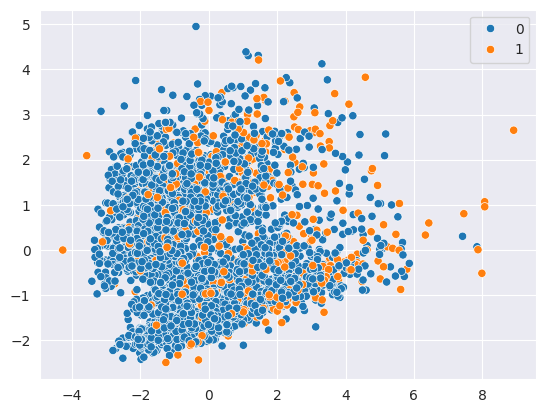

In [4]:
# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
x_data_pca = pca.fit_transform(x_data)

# Data visualization
pc1 = x_data_pca[:, 0]
pc2 = x_data_pca[:, 1]
sns.scatterplot(x=pc1, y=pc2, hue=y_data)
plt.show()

In [5]:
# Split training set and validation set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    train_size=0.7, random_state=20)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_data_pca, y_data,
                                                                    train_size=0.7, random_state=20)

In [6]:
# Perceptron approach
def perceptron_approach(x_train, x_test, y_train, y_test):
    # Train model
    perceptron = Perceptron(fit_intercept=False)
    perceptron.fit(x_train, y_train)
    # Predict results
    y_predict = perceptron.predict(x_test)
    # Print accuracy score, precision score, recall score, coefficient
    print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')
    print(f'Precision score: {precision_score(y_test, y_predict)}')
    print(f'Recall score: {recall_score(y_test, y_predict)}')
    print(f'Coefficient: {perceptron.coef_}')


# Logistic Regression approach
def logistic_regression_approach(x_train, x_test, y_train, y_test):
    # Train model
    logistic = LogisticRegression(fit_intercept=False)
    logistic.fit(x_train, y_train)
    # Predict results
    y_predict = logistic.predict(x_test)
    # Print accuracy score, precision score, recall score, coefficient
    print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')
    print(f'Precision score: {precision_score(y_test, y_predict)}')
    print(f'Recall score: {recall_score(y_test, y_predict)}')
    print(f'Coefficient: {logistic.coef_}')


# Naive Bayes approach
def naive_bayes_approach(x_train, x_test, y_train, y_test):
    # Train model
    naive_bayes = GaussianNB()
    naive_bayes.fit(x_train, y_train)
    # Predict results
    y_predict = naive_bayes.predict(x_test)
    # Print accuracy score, precision score, recall score
    print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')
    print(f'Precision score: {precision_score(y_test, y_predict)}')
    print(f'Recall score: {recall_score(y_test, y_predict)}')

In [7]:
perceptron_approach(x_train, x_test, y_train, y_test)

Accuracy score: 0.5606198723792161
Precision score: 0.18144329896907216
Recall score: 0.5086705202312138
Coefficient: [[-2.01172051  1.39273652 -1.0395032   2.55422208 -0.11101822  3.46409758
  11.14417271 -0.79790627 -1.06333432  1.90543376  2.22935723 -5.60681345
   0.27251533  0.82451975  2.87427945]]


- Hệ số của mô hình Perceptron có sự biến thiên khá lớn, với một số giá trị khá cao và dương, trong khi một số khác lại âm sâu. Điều này có thể cho thấy rằng Perceptron gặp khó khăn trong việc tối ưu hóa đối với tập dữ liệu này, và nó có thể không hội tụ tốt.
- **Nhận xét:** Phương pháp này dường như không phải là lựa chọn tốt cho dữ liệu hiện tại, vì cả độ chính xác (accuracy) và độ chính xác (precision) đều thấp, mặc dù recall đạt trung bình. Điều này có thể chỉ ra rằng mô hình đang gặp vấn đề với việc phân loại chính xác những trường hợp dương tính.

In [8]:
logistic_regression_approach(x_train, x_test, y_train, y_test)

Accuracy score: 0.6116681859617138
Precision score: 0.25244618395303325
Recall score: 0.7456647398843931
Coefficient: [[ 0.0999878   0.21738145 -0.02104167  0.05101645  0.109437    0.06842121
   0.02742978  0.06124454  0.01236564  0.03525362  0.25670736 -0.07149005
   0.01579376  0.01456263  0.15927487]]


- Các hệ số của Logistic Regression tương đối nhỏ, có nghĩa là các đặc trưng trong tập dữ liệu có ảnh hưởng ít hơn đến quyết định của mô hình so với Perceptron.
- **Nhận xét:** Logistic Regression cung cấp kết quả khá tốt, đặc biệt là về recall (khả năng nhận diện dương tính), và nhìn chung có vẻ mô hình này cân bằng giữa các chỉ số hơn so với Perceptron. Tuy nhiên, precision vẫn còn thấp, cho thấy mô hình phân loại sai nhiều trường hợp âm tính là dương tính.


In [9]:
naive_bayes_approach(x_train, x_test, y_train, y_test)

Accuracy score: 0.8103919781221514
Precision score: 0.3504273504273504
Recall score: 0.23699421965317918


- **Nhận xét:** Naive Bayes có độ chính xác cao nhất, và precision cũng cao hơn hai phương pháp còn lại, cho thấy nó tốt hơn trong việc hạn chế sai lầm khi phân loại các trường hợp dương tính. Tuy nhiên, recall thấp cho thấy mô hình này bỏ sót nhiều trường hợp cần phân loại đúng.

**Tổng kết:**
- Naive Bayes có độ chính xác tổng thể tốt nhất, nhưng lại bỏ sót nhiều trường hợp dương tính (recall thấp).
- Logistic Regression mang lại hiệu suất cân bằng nhất, đặc biệt với recall cao nhưng precision thấp.
- Perceptron hoạt động kém hơn hẳn, với cả accuracy và precision đều thấp.

In [10]:
perceptron_approach(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Accuracy score: 0.6080218778486782
Precision score: 0.2294736842105263
Recall score: 0.630057803468208
Coefficient: [[1.67865779 0.16193234]]


**Nhận xét:** Việc giảm chiều dữ liệu dường như đã cải thiện cả độ chính xác (accuracy), độ chính xác (precision) và khả năng nhận diện đúng các trường hợp dương tính (recall). Mô hình Perceptron chịu ảnh hưởng tích cực từ việc giảm chiều, giúp cho mô hình này hội tụ tốt hơn và tránh overfitting từ những đặc trưng không quan trọng.


In [11]:
logistic_regression_approach(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Accuracy score: 0.6134913400182316
Precision score: 0.2346723044397463
Recall score: 0.6416184971098265
Coefficient: [[0.19840419 0.15161476]]


**Nhận xét:** Logistic Regression có độ chính xác (accuracy) và độ chính xác (precision) tương đối tương đương sau khi giảm chiều. Tuy nhiên, recall có sự suy giảm nhỏ (từ 0.746 xuống 0.642), cho thấy mô hình đã bỏ sót nhiều trường hợp dương tính hơn. Điều này có thể do một số thông tin quan trọng bị mất đi trong quá trình giảm chiều, nhưng tổng thể mô hình vẫn duy trì được hiệu suất khá ổn định.

In [12]:
naive_bayes_approach(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Accuracy score: 0.8304466727438469
Precision score: 0.3488372093023256
Recall score: 0.08670520231213873


**Nhận xét:** Naive Bayes sau khi giảm chiều đạt được độ chính xác tổng thể tốt nhất (accuracy 0.830), nhưng recall lại bị ảnh hưởng nghiêm trọng (giảm mạnh từ 0.237 xuống 0.087). Điều này cho thấy mô hình đã mất khả năng nhận diện nhiều trường hợp dương tính, dẫn đến việc bỏ sót quá nhiều dữ liệu dương tính quan trọng. Có thể Naive Bayes phụ thuộc nhiều vào việc sử dụng đầy đủ các đặc trưng và giảm chiều khiến nó khó phân loại chính xác hơn

**Nhận xét về ảnh hưởng của việc giảm chiều dữ liệu:**
- **Perceptron:** Chịu ảnh hưởng tích cực nhất khi giảm chiều, với cả ba chỉ số đều được cải thiện. Điều này có thể cho thấy rằng Perceptron hoạt động tốt hơn khi có ít đặc trưng hơn, giúp giảm overfitting.
- **Logistic Regression:** Có ít thay đổi nhất sau khi giảm chiều. Mặc dù recall giảm, tổng thể mô hình vẫn ổn định và đạt kết quả khá cân bằng. Điều này cho thấy Logistic Regression ít bị ảnh hưởng bởi giảm chiều dữ liệu, vì nó vốn dĩ đã là mô hình tuyến tính với khả năng tối ưu hóa tốt ngay cả khi số chiều giảm.
- **Naive Bayes:** Chịu ảnh hưởng tiêu cực nhiều nhất từ việc giảm chiều, đặc biệt là về recall, điều này có thể do Naive Bayes phụ thuộc nhiều vào phân phối xác suất của từng đặc trưng. Việc mất đi các thông tin quan trọng có thể làm suy yếu khả năng phân loại của Naive Bayes.


